<a href="https://colab.research.google.com/github/roycanchica79/skills-introduction-to-github/blob/dependabot%2Fgithub_actions%2Factions%2Fcheckout-4/Modelos_supervisados_y_no_supervisados_(roy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


librerias

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
!pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold




# cargar datos


In [ ]:
# Cargar datos
file_path = 'AbandonoEmpleados.csv'
df = pd.read_csv(file_path)

# Mostrar primeras filas
print(df.head())

# Información general de los datos
print(df.info())

# Descripción estadística
print(df.describe())

# Visualización de los datos
print(df.head())



  edad;abandono;viajes;departamento;distancia_casa;educacion;carrera;empleados;id;satisfaccion_entorno;sexo;implicacion;nivel_laboral;puesto;satisfaccion_trabajo;estado_civil;salario_mes;num_empresas_anteriores;mayor_edad;horas_extra;incremento_salario_porc;evaluacion;satisfaccion_companeros;horas_quincena;nivel_acciones;anos_experiencia;num_formaciones_ult_ano;conciliacion;anos_compania;anos_en_puesto;anos_desde_ult_promocion;anos_con_manager_actual
0  41;Yes;Travel_Rarely;Sales;1;Universitaria;Lif...                                                                                                                                                                                                                                                                                                                                                                                                                  
1  49;No;Travel_Frequently;Research & Development...                                      

#Código para recargar y explorar los datos con el separador adecuado

In [ ]:
# Cargar datos con el separador correcto
df = pd.read_csv(file_path, sep=';')

# Mostrar primeras filas
print(df.head())

# Información general de los datos
print(df.info())

# Descripción estadística
print(df.describe())


   edad abandono             viajes            departamento  distancia_casa  \
0    41      Yes      Travel_Rarely                   Sales               1   
1    49       No  Travel_Frequently  Research & Development               8   
2    37      Yes      Travel_Rarely  Research & Development               2   
3    33       No  Travel_Frequently  Research & Development               3   
4    27       No      Travel_Rarely  Research & Development               2   

       educacion        carrera  empleados  id satisfaccion_entorno  ...  \
0  Universitaria  Life Sciences          1   1                Media  ...   
1     Secundaria  Life Sciences          1   2                 Alta  ...   
2     Secundaria          Other          1   4             Muy_Alta  ...   
3  Universitaria  Life Sciences          1   5             Muy_Alta  ...   
4  Universitaria        Medical          1   7                 Baja  ...   

   satisfaccion_companeros horas_quincena  nivel_acciones anos_exper

# Exploración de los Datos

In [ ]:
# Ver primeras filas del DataFrame
print(df.head())

# Información general del DataFrame
print(df.info())

# Descripción estadística del DataFrame
print(df.describe())


   edad abandono             viajes            departamento  distancia_casa  \
0    41      Yes      Travel_Rarely                   Sales               1   
1    49       No  Travel_Frequently  Research & Development               8   
2    37      Yes      Travel_Rarely  Research & Development               2   
3    33       No  Travel_Frequently  Research & Development               3   
4    27       No      Travel_Rarely  Research & Development               2   

       educacion        carrera  empleados  id satisfaccion_entorno  ...  \
0  Universitaria  Life Sciences          1   1                Media  ...   
1     Secundaria  Life Sciences          1   2                 Alta  ...   
2     Secundaria          Other          1   4             Muy_Alta  ...   
3  Universitaria  Life Sciences          1   5             Muy_Alta  ...   
4  Universitaria        Medical          1   7                 Baja  ...   

   satisfaccion_companeros horas_quincena  nivel_acciones anos_exper

 # Limpieza de Datos
Identificamos varias columnas con datos faltantes o mal formateados. Vamos a realizar algunos pasos de limpieza básicos:

- Rellenar los valores faltantes.
- Convertir columnas a los tipos de datos adecuados.
- Codificar variables categóricas.

In [ ]:
# Rellenar valores faltantes
df['sexo'].fillna(df['sexo'].mode()[0], inplace=True)
df['anos_en_puesto'].fillna(df['anos_en_puesto'].mean(), inplace=True)

# Convertir columnas a tipos de datos adecuados
df['abandono'] = df['abandono'].apply(lambda x: 1 if x == 'Yes' else 0)
df['sexo'] = df['sexo'].apply(lambda x: 1 if x == 'Male' else 0)
df['horas_extra'] = df['horas_extra'].apply(lambda x: 1 if x == 'Yes' else 0)

 # Verificar columnas existentes en el DataFrame
print(df.columns)

# Ajustar la lista de columnas para get_dummies según las columnas existentes
columns_to_encode = [col for col in ['viajes', 'departamento', 'educacion', 'carrera', 'implicacion', 'puesto', 'estado_civil', 'mayor_edad', 'evaluacion', 'satisfaccion_companeros', 'conciliacion'] if col in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode)


# Identify columns with non-numerical data
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)

# Convert non-numerical columns to numerical (example using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])


# Verificar la limpieza
print(df.info())

# Dividir datos en características (X) y etiqueta (y)
X = df.drop(columns=['abandono'])
y = df['abandono']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')






Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'id', 'satisfaccion_entorno',
       'sexo', 'implicacion', 'nivel_laboral', 'puesto',
       'satisfaccion_trabajo', 'estado_civil', 'salario_mes',
       'num_empresas_anteriores', 'mayor_edad', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'horas_quincena', 'nivel_acciones', 'anos_experiencia',
       'num_formaciones_ult_ano', 'conciliacion', 'anos_compania',
       'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')
Index(['satisfaccion_entorno', 'satisfaccion_trabajo'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   edad                                 1470 

 # Árboles de Decision:
 son modelos de predicción utilizados tanto para clasificación como para regresión. Un árbol de decisión divide los datos en subconjuntos basándose en las características de los datos, creando un modelo en forma de estructura de árbol.

Accuracy: 0.7936507936507936


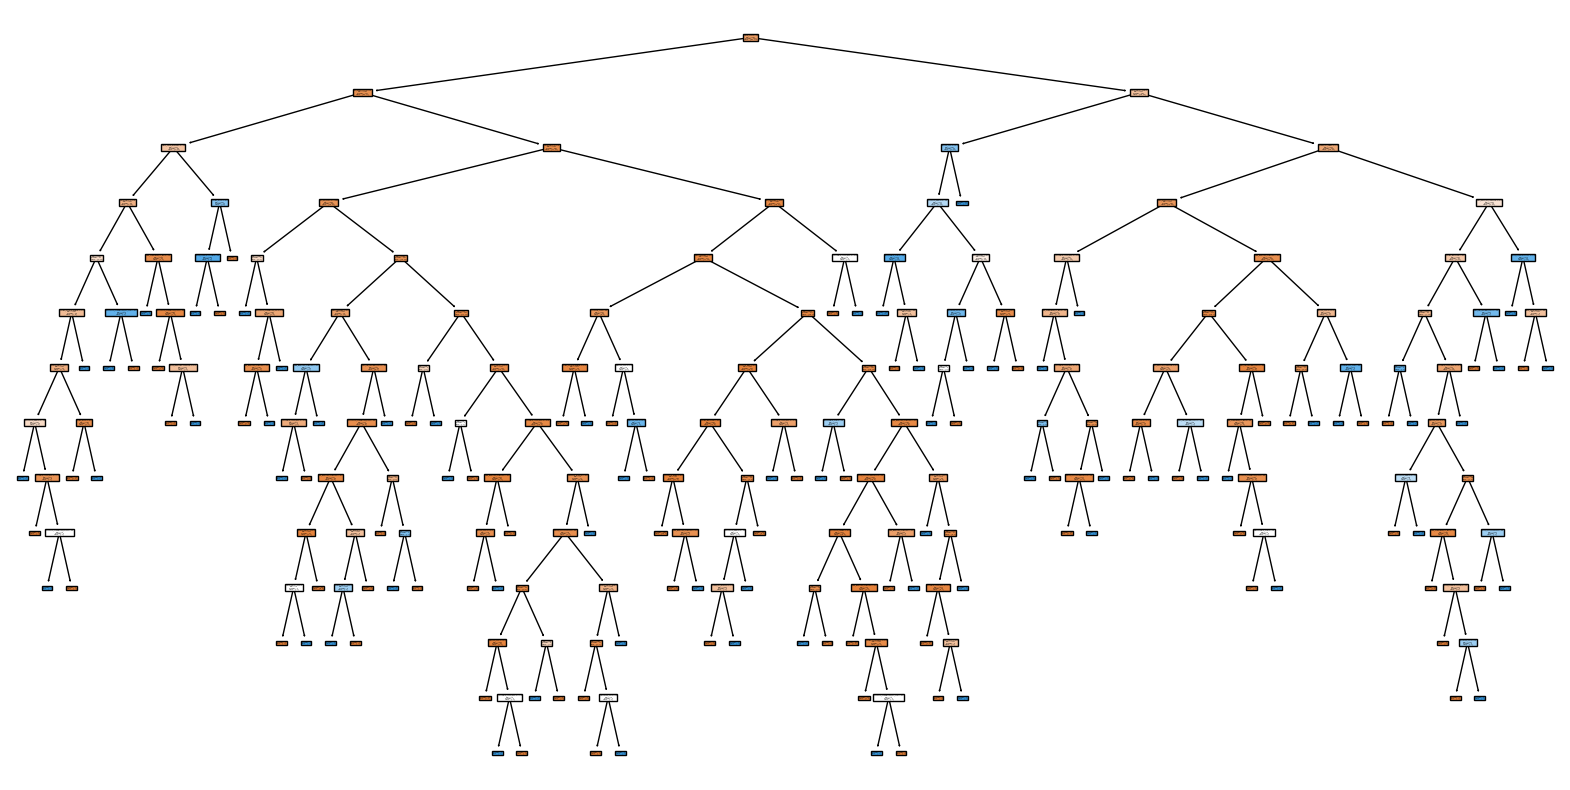

In [ ]:
# Dividir datos en características (X) y etiqueta (y)
X = df.drop(columns=['abandono'])
y = df['abandono']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predecir
y_pred = dt.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


#1. Modelos Supervisados
- Random Forest: es un algoritmo de aprendizaje conjunto que construye múltiples árboles de decisión y los fusiona para obtener una predicción más precisa y estable.

Accuracy: 0.8684807256235828


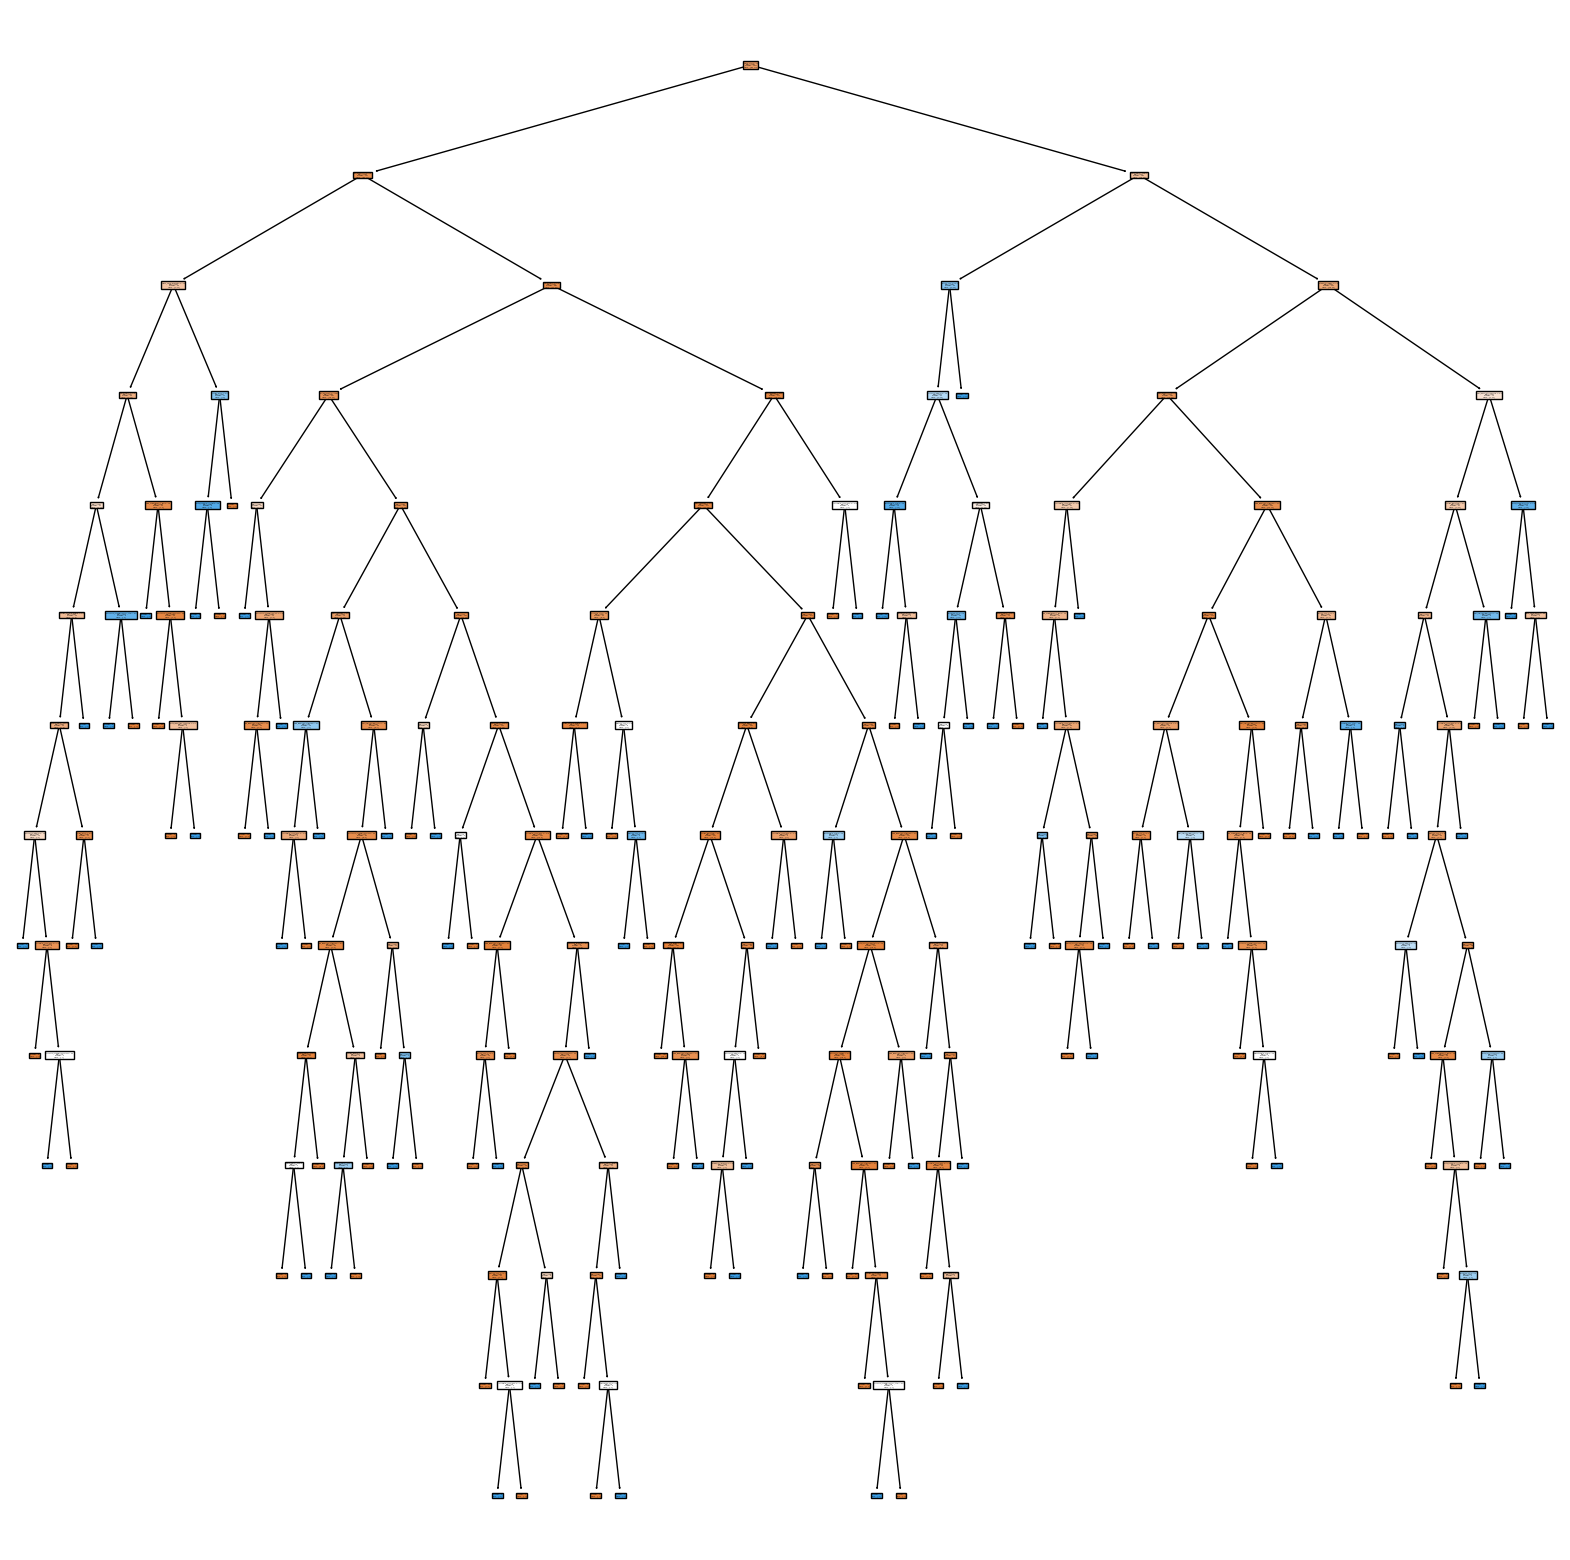

In [ ]:
# Dividir datos en características (X) y etiqueta (y)
X = df.drop(columns=['abandono'])
y = df['abandono']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar árbol
plt.figure(figsize=(20,20))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()





Accuracy: 0.7936507936507936


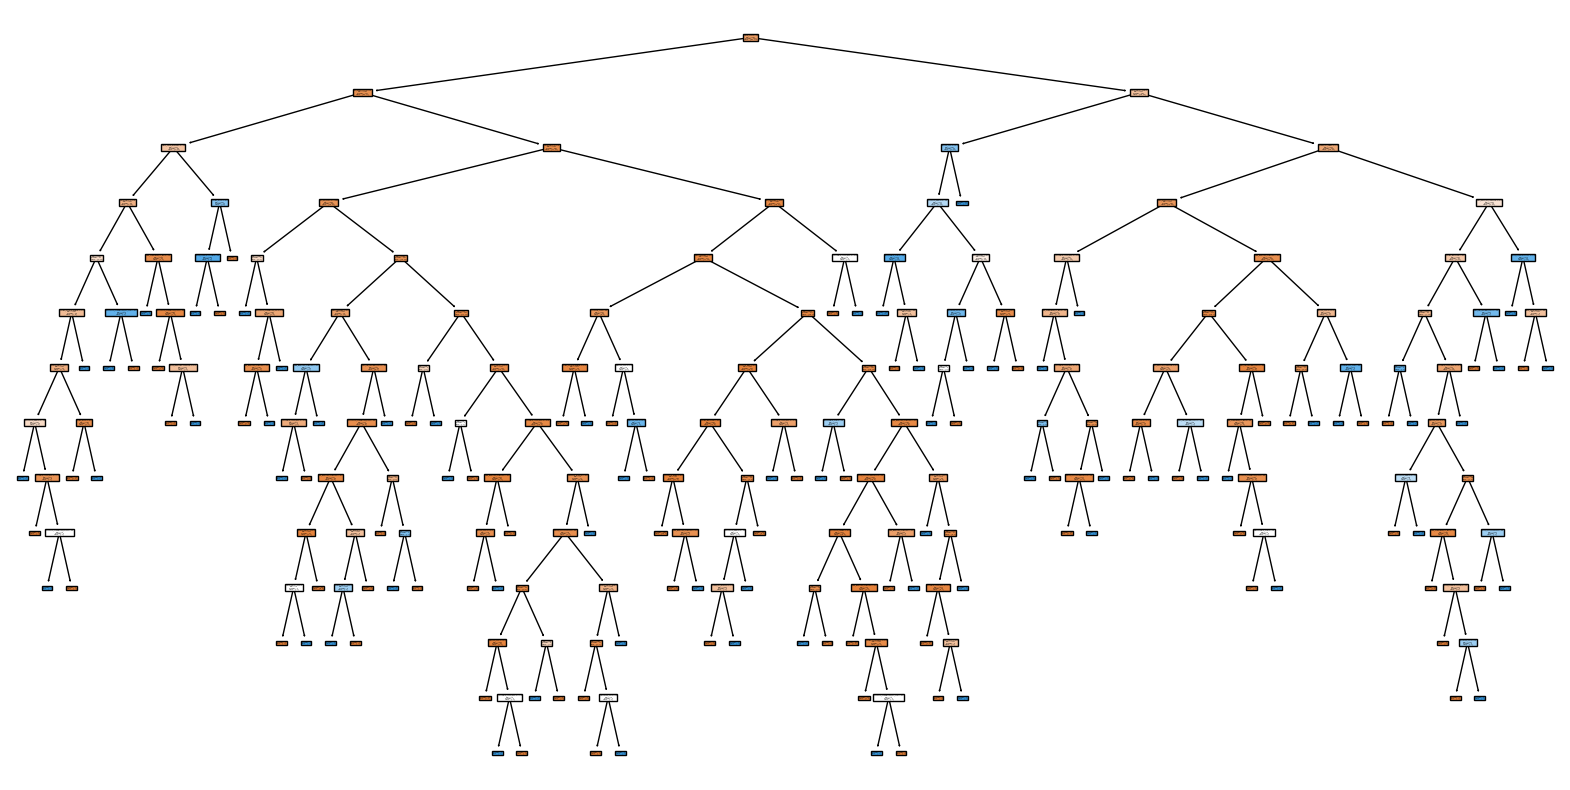

In [ ]:
# Dividir datos en características (X) y etiqueta (y)
X = df.drop(columns=['abandono'])
y = df['abandono']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predecir
y_pred = dt.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


- XGBoost: es una implementación eficiente de Gradient Boosting para árboles de decisión. Optimiza la velocidad y el rendimiento.

Accuracy: 0.8707482993197279


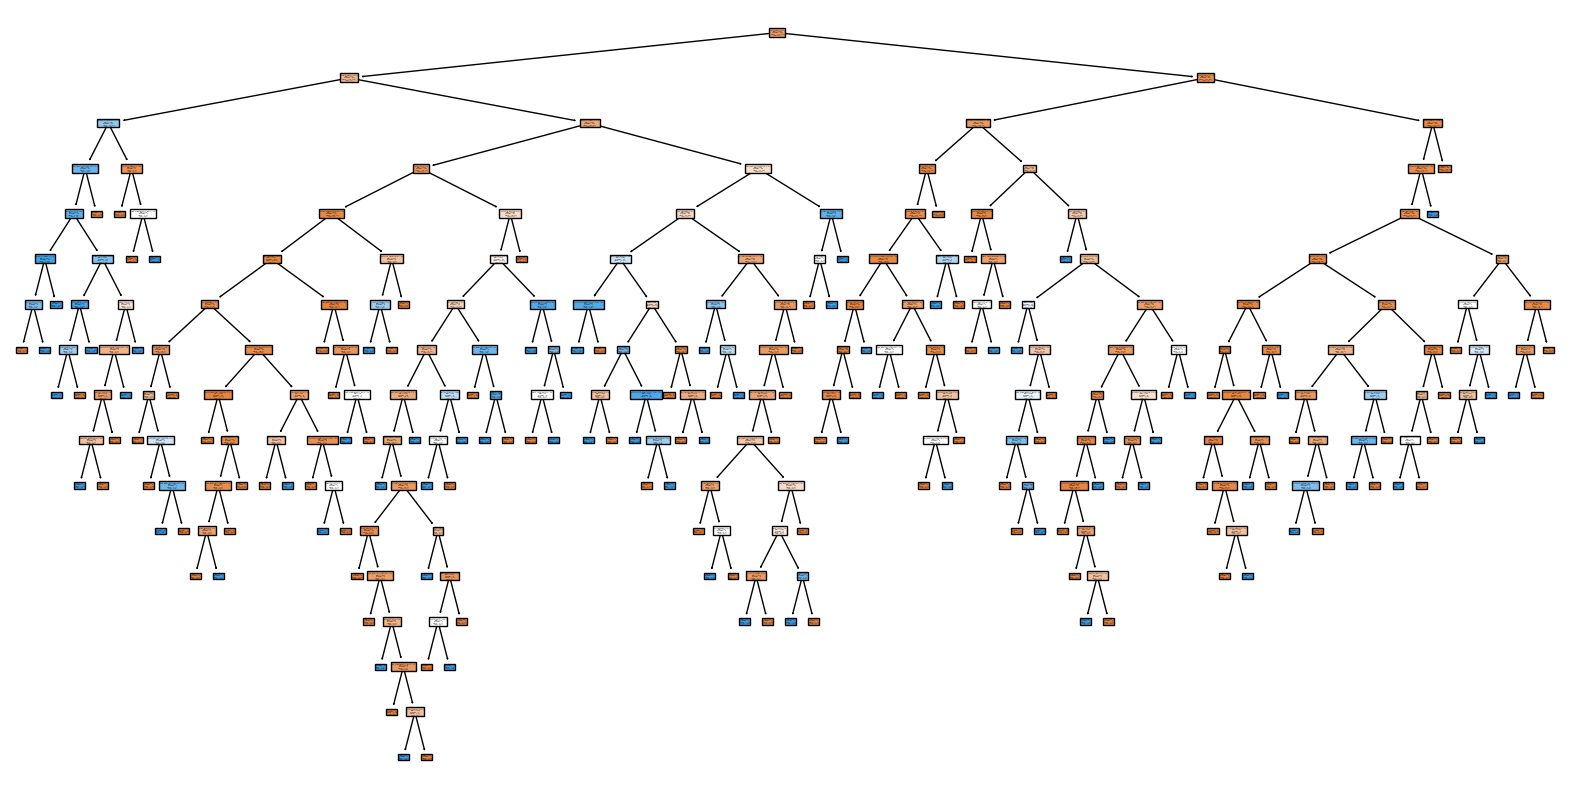

In [ ]:
# Entrenar modelo
xg_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xg_clf.fit(X_train, y_train)

# Predecir
y_pred = xg_clf.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar arbol
plt.figure(figsize=(20,10))

# Use the trained Random Forest model 'rf' to extract a single tree for visualization
# Here, we are selecting the first tree (index 0) from the forest
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


 - k-Nearest Neighbors (k-NN)
es un clasificador simple basado en la votación de los 'k' vecinos más cercanos en el espacio de características

Accuracy: 0.8253968253968254


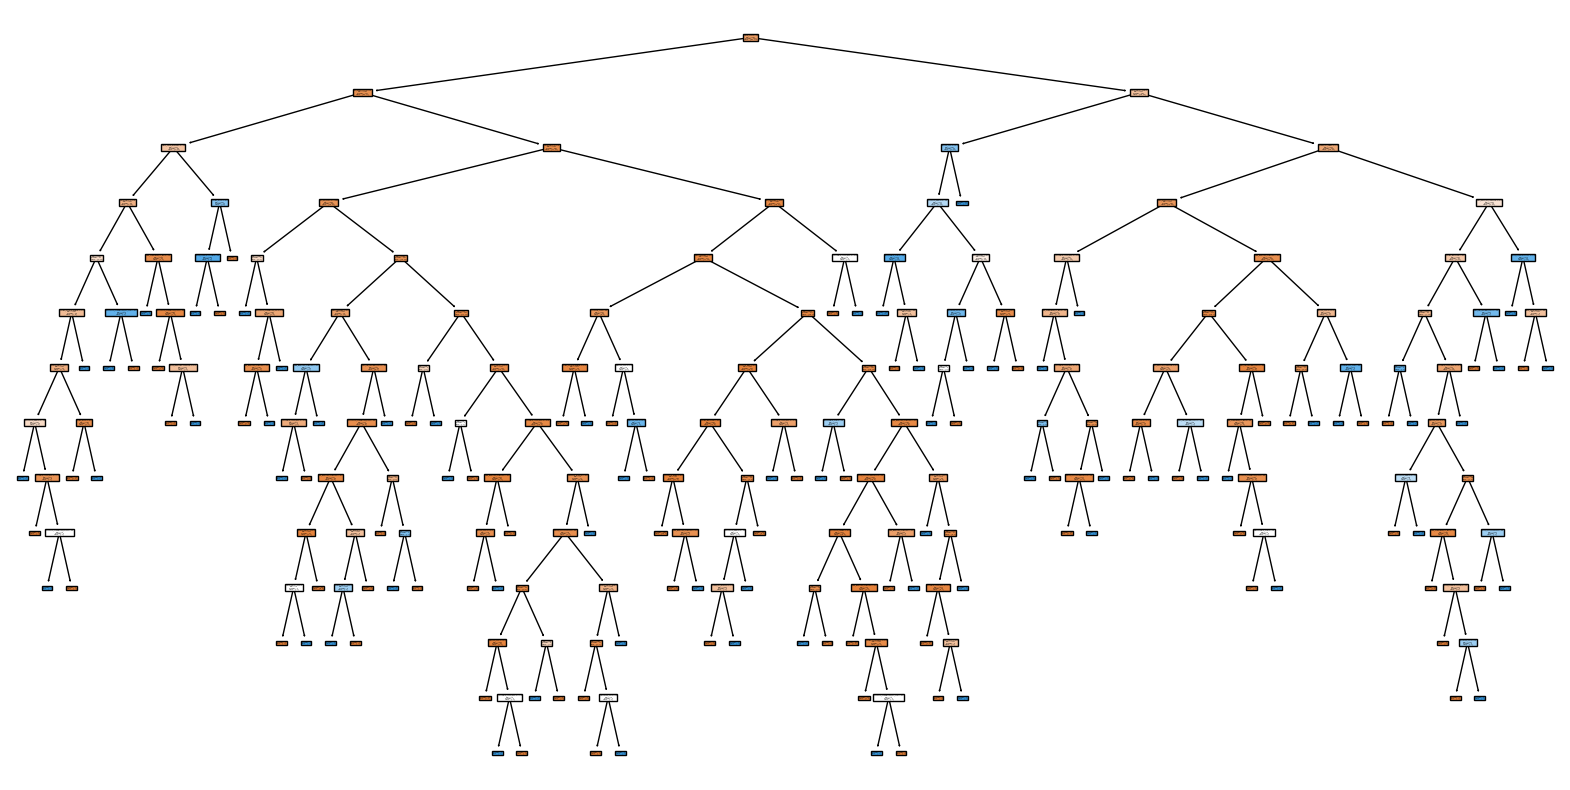

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Entrenar modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predecir
y_pred = knn.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()



- Naive Bayes: es un clasificador basado en la aplicación del teorema de Bayes con la asunción de independencia entre las características.

Accuracy: 0.6780045351473923


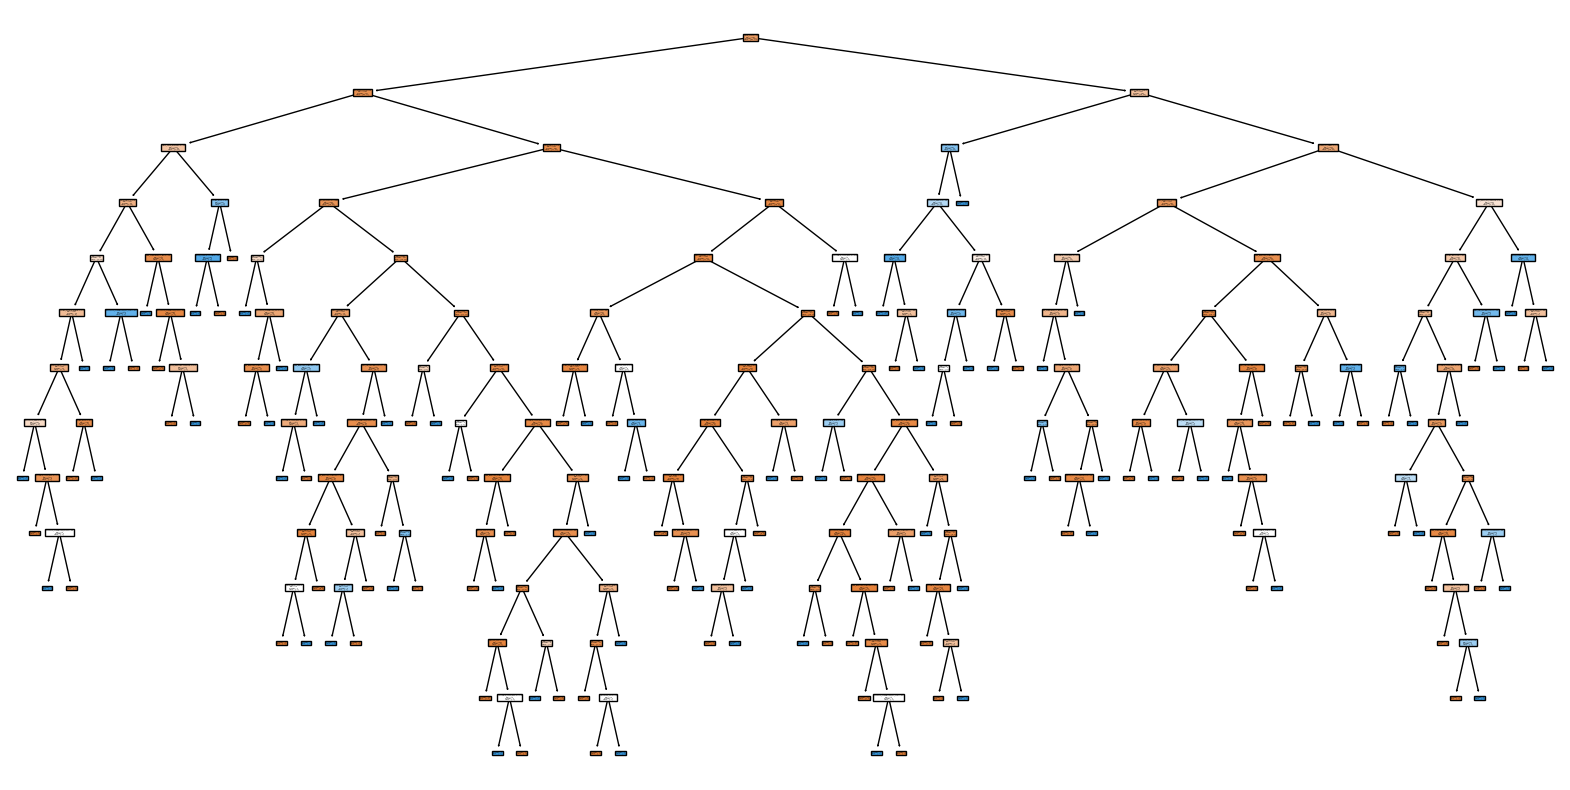

In [ ]:
# Entrenar modelo
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predecir
y_pred = nb.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


- Support Vector Machine (SVM): es un clasificador que encuentra el hiperplano que mejor separa las clases en el espacio de características.

Accuracy: 0.8662131519274376


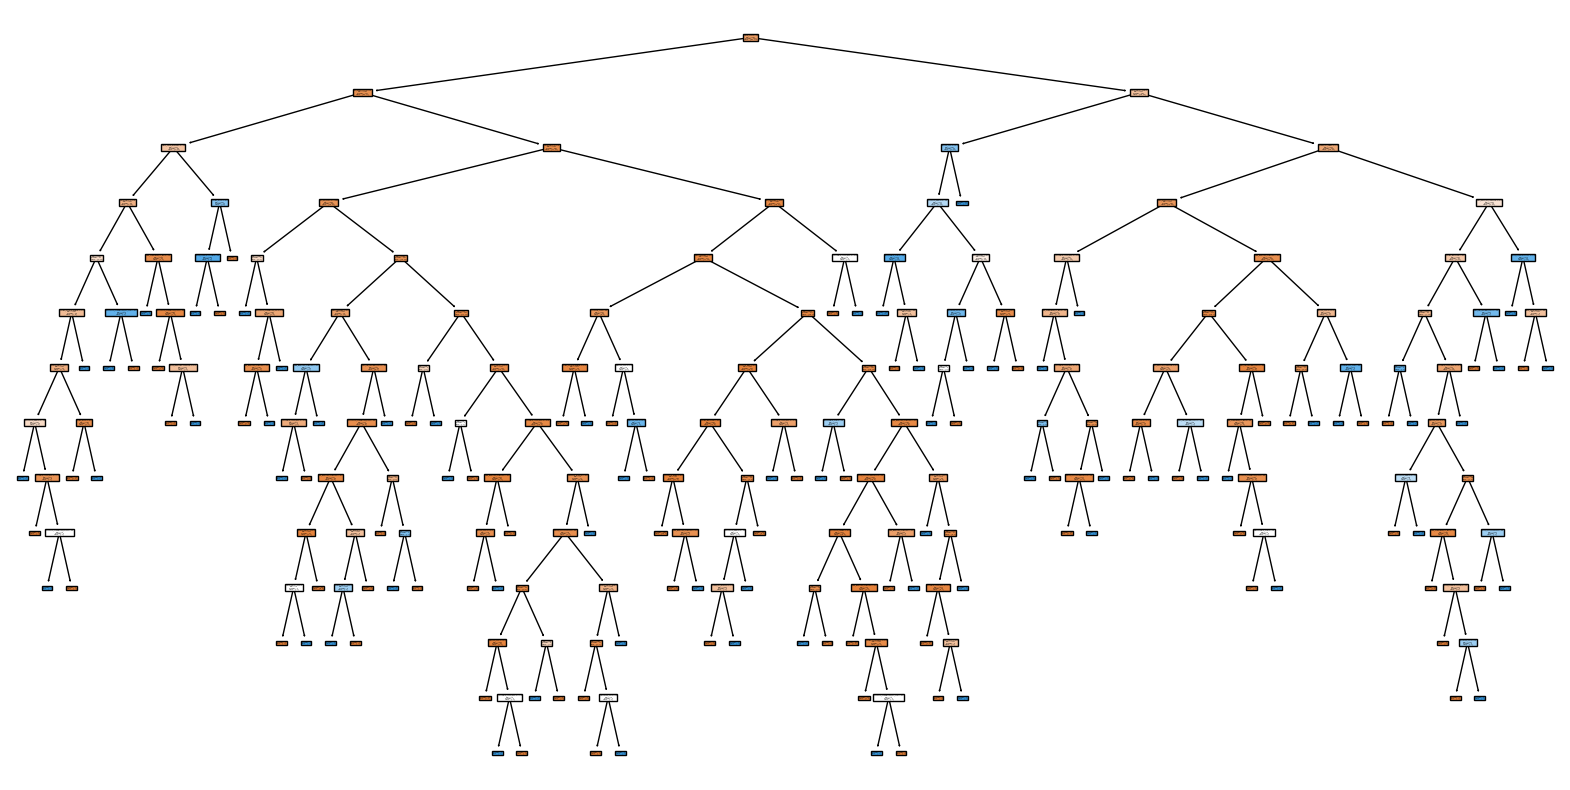

In [ ]:
# Entrenar modelo
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predecir
y_pred = svm.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


- Los modelos de regresión: se utilizan para predecir valores continuos.

Mean Squared Error: 1319251.2497441277


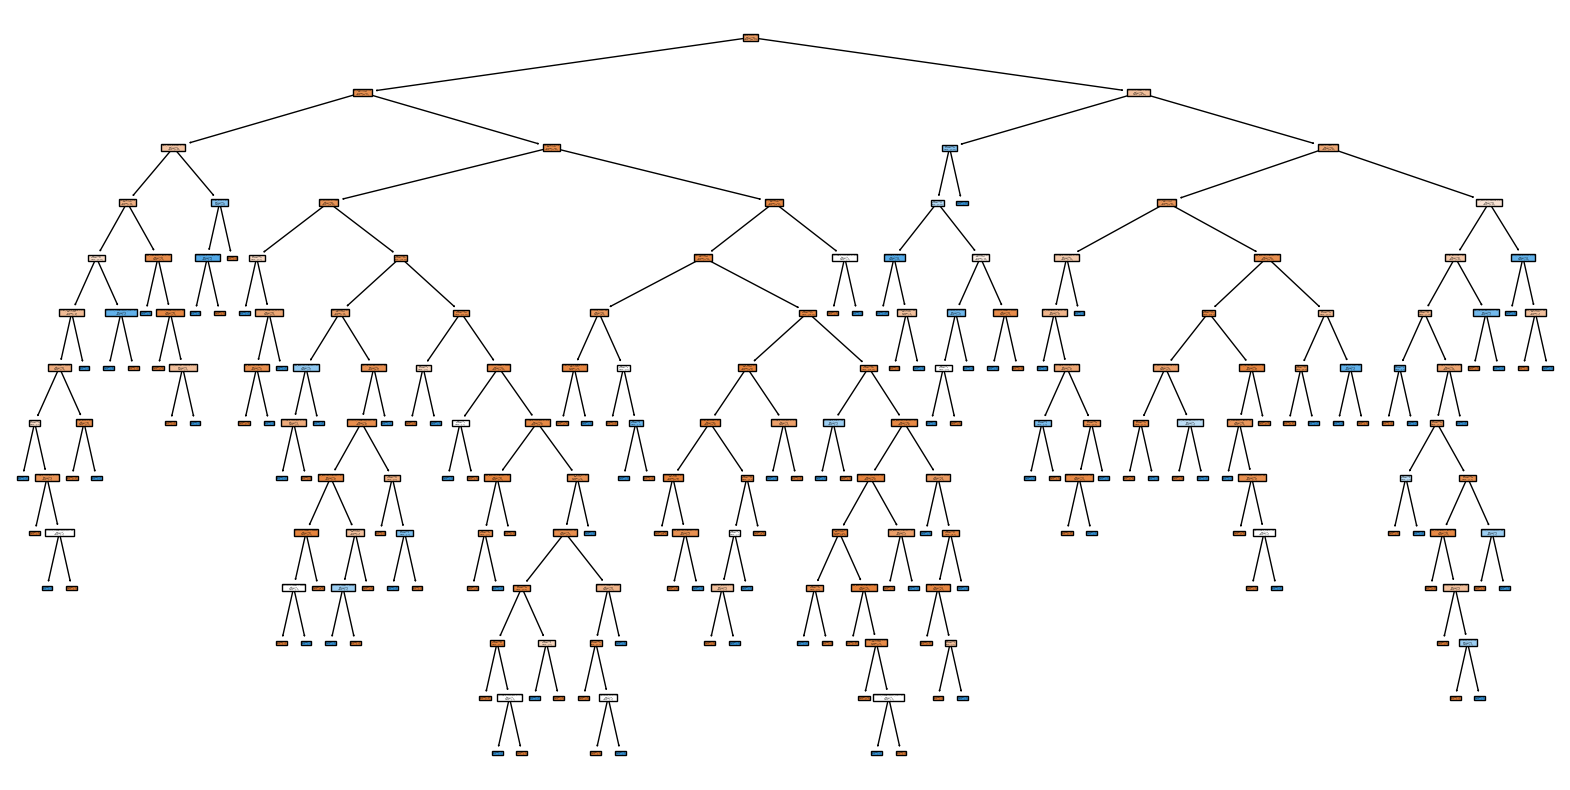

In [ ]:
# Dividir datos en características (X) y etiqueta (y) para una columna continua
X = df.drop(columns=['salario_mes'])
y = df['salario_mes']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predecir
y_pred = lr.predict(X_test)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


 - La validación cruzada: es una técnica para evaluar el rendimiento de un modelo dividiendo los datos en subconjuntos y entrenando/evaluando múltiples veces

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross-validated scores: [0.00204082 0.         0.        ]
Mean score: 0.0006802721088435375


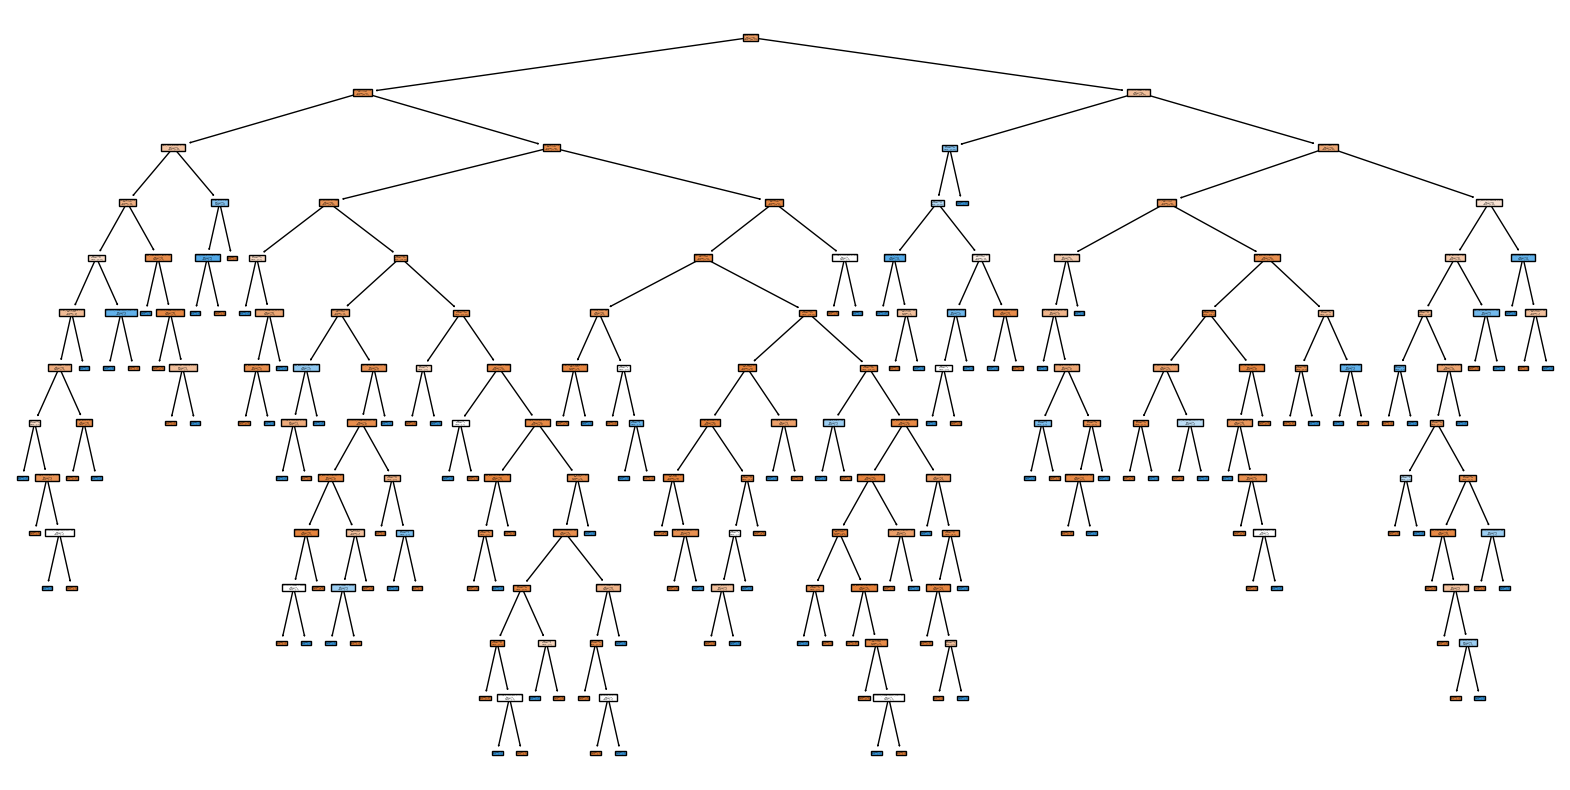

In [ ]:
# Definir modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Use StratifiedKFold with a lower number of splits
skf = StratifiedKFold(n_splits=3)  # Adjust n_splits as needed

# Validación cruzada
scores = cross_val_score(rf, X, y, cv=skf) # Use skf for cross-validation
print(f'Cross-validated scores: {scores}')
print(f'Mean score: {scores.mean()}')

# Visualizar árbol
plt.figure(figsize=(20,10))

# Assuming 'best_dt' should be 'dt' based on your code
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()



# Aprendizaje No Supervisado Clustering
-  KMeans: es un algoritmo de clustering que particiona los datos en 'k' clusters basándose en la distancia a los centroides.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


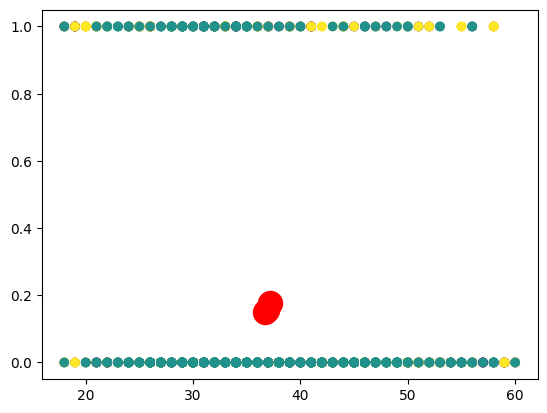

In [ ]:
# Entrenar modelo
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Visualización
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()







 - Agglomerative Clustering: (El clustering aglomerativo) es un tipo de clustering jerárquico que construye un árbol de clusters fusionando los datos basándose en la distancia.

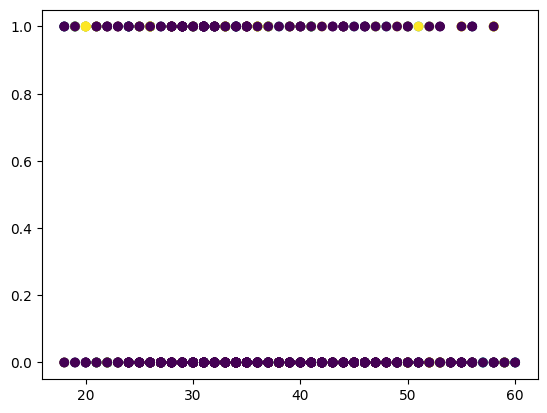

In [ ]:
# Entrenar modelo
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

# Visualización
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.show()


- Affinity Propagation: es un algoritmo de clustering que identifica ejemplos representativos (exemplars) en lugar de centroides.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


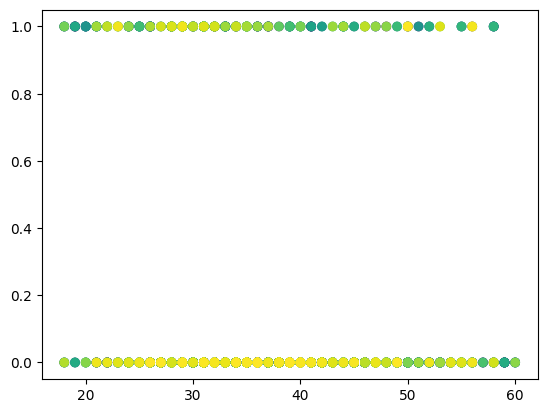

In [ ]:
# Entrenar modelo
aff_propagation = AffinityPropagation(random_state=42)
labels = aff_propagation.fit_predict(X)

# Visualización
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.show()


- Spectral Clustering utiliza el espectro del gráfico de similitud de los datos para realizar el clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 167 with accuracies 
[2.38755873e-05 1.97108861e-05 2.05852087e-04 6.66394788e-04]
not reaching the requested tolerance 2.1904706954956055e-05.
Use iteration 167 instead with accuracy 
0.00022895833710779795.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.38755880e-05 1.97108853e-05 2.05852087e-04 6.66394788e-04]
not reaching the requested tolerance 2.1904706954956055e-05.
  _, diffusion_map = lobpcg(


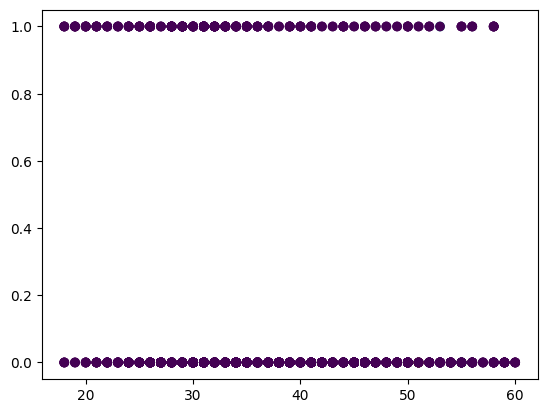

In [ ]:
# Entrenar modelo
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
labels = spectral_clustering.fit_predict(X)

# Visualización
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.show()


- Mean-Shift: es un algoritmo de clustering que agrupa los puntos de datos iterativamente moviéndolos hacia la densidad más alta de puntos.

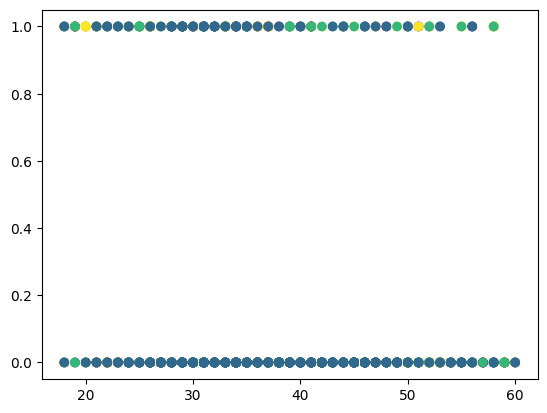

In [ ]:
# Entrenar modelo
mean_shift = MeanShift()
labels = mean_shift.fit_predict(X)

# Visualización &#8203;:citation[oaicite:0]{index=0}&#8203;
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.show()


# Código para Búsqueda en Grilla (Grid Search)
La búsqueda en grilla (Grid Search) es una técnica para ajustar los hiperparámetros de un modelo mediante la evaluación sistemática de un conjunto de valores predefinidos para cada parámetro.

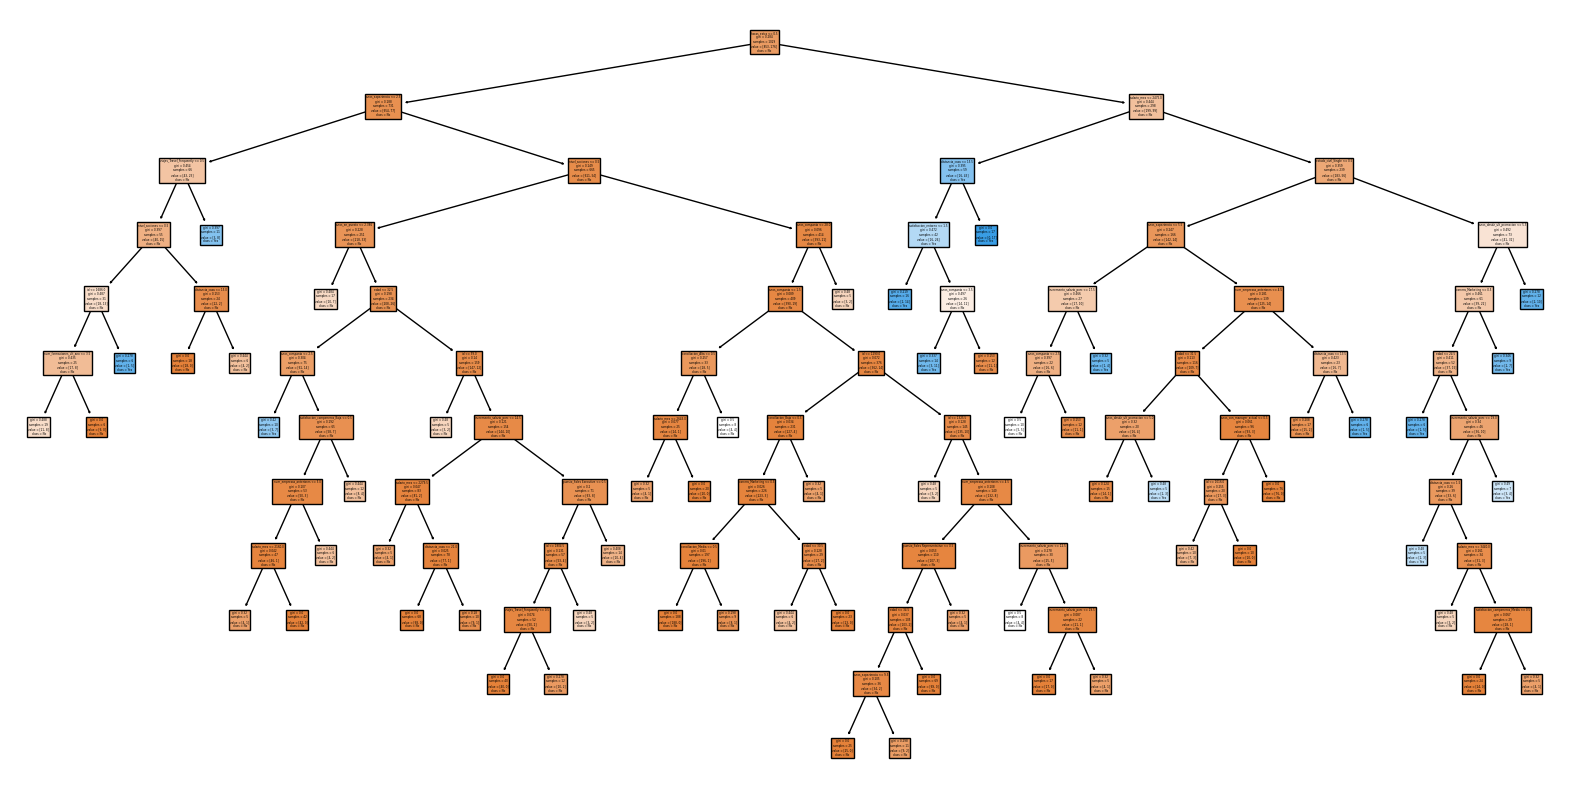

(0.7936507936507936,
 {'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 20},
 0.8412698412698413)

In [ ]:
# Dividir datos en características (X) y etiqueta (y)
X = df.drop(columns=['abandono'])
y = df['abandono']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo básico de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predecir
y_pred = dt.predict(X_test)

# Evaluar
accuracy_basic = accuracy_score(y_test, y_pred)

# Búsqueda en grilla
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_dt = grid_search.best_estimator_

# Predecir con mejor modelo
y_pred_best = best_dt.predict(X_test)

# Evaluar
accuracy_best = accuracy_score(y_test, y_pred_best)

# Visualización del mejor Árbol de Decisión
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

accuracy_basic, grid_search.best_params_, accuracy_best
